In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("homeprices_banglore.csv")

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [10]:
#scaling the data
len(df)

20

In [11]:
from sklearn import preprocessing
x = preprocessing.MinMaxScaler()
y = preprocessing.MinMaxScaler()

scaled_X = x.fit_transform(df.drop('price',axis='columns'))
scaled_y = y.fit_transform(df['price'].values.reshape(len(df),1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [35]:
scaled_y.shape

(20, 1)

In [36]:
scaled_y.reshape(20,)



array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [18]:
scaled_y.shape

(20, 1)

In [42]:
c=np.zeros(5)

In [43]:
c.shape


(5,)

In [54]:
#Batch gradient descent


def batch_GDS(X,y_true,epochs,alpha=0.001):
    
    features=X.shape[1] 
    #initializing initil weights with ones
    
    w=np.ones(features)
    b=0
    total=len(X)
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        
#         y_pred= w[0]*X[0] + w[1]*x[1] + b
        y_pred=np.dot(w,X.T)
       
        #derivatives
        w_grad = -(2/total)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total)*np.sum(y_true-y_pred)
        
        w = w - alpha * w_grad
        b = b - alpha * b_grad
        
        cost = np.mean(np.square(y_true-y_pred)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_GDS(scaled_X,scaled_y.reshape(scaled_y.shape[0],),5000)
w, b, cost
    

(array([0.58398868, 0.37911886]), -1.2863927012147247, 0.008499762277934983)

In [55]:
w

array([0.58398868, 0.37911886])

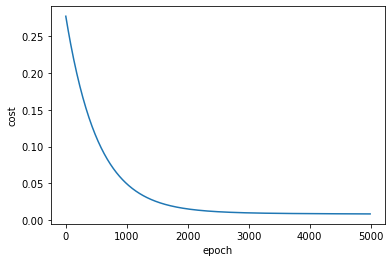

In [56]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [57]:
b

-1.2863927012147247

In [58]:
cost_list

[0.2768777174681,
 0.2718372937665704,
 0.2668919323348584,
 0.26203983914970697,
 0.25727925404544794,
 0.25260845007502664,
 0.24802573288308555,
 0.2435294400908797,
 0.23911794069279887,
 0.23478963446428064,
 0.23054295138089603,
 0.2263763510483995,
 0.22228832214353517,
 0.2182773818653952,
 0.21434207539713435,
 0.2104809753778417,
 0.20669268138438035,
 0.202975819423005,
 0.19932904143057553,
 0.19575102478518272,
 0.19224047182600995,
 0.18879610938225636,
 0.1854166883109502,
 0.1821009830434855,
 0.178847791140715,
 0.17565593285644204,
 0.17252425070914795,
 0.16945160906180382,
 0.1664368937096113,
 0.16347901147552377,
 0.16057688981340185,
 0.15772947641865698,
 0.1549357388462443,
 0.1521946641358643,
 0.14950525844423815,
 0.1468665466843228,
 0.1442775721713345,
 0.14173739627545381,
 0.1392450980810837,
 0.13679977405253924,
 0.13440053770604582,
 0.13204651928792815,
 0.1297368654588723,
 0.1274707389841465,
 0.1252473184296684,
 0.12306579786380785,
 0.1209253865

In [61]:
#prediction function:


def predict(area,bedrooms,w,b):
    scaled_X = x.transform([[area, bedrooms]])[0]
    print(w[0],w[1],scaled_X[1],b)
    price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    print(price)
    return y.inverse_transform([[price]])

predict(2600,1,w,b)

0.5839886806487791 0.3791188558605229 0.0 -1.2863927012147247
-0.9239169683982412


/Users/serahverg/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[-92.72879073]])

In [64]:
import random

In [65]:
def SGD(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70861204, 0.67721615]), -0.2335105942885086, 0.002180905280600755)

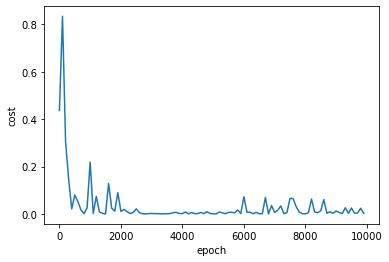

In [66]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [77]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost


(array([0.70997053, 0.67813156]), -0.23327158195920047, 0.015278810850522257)

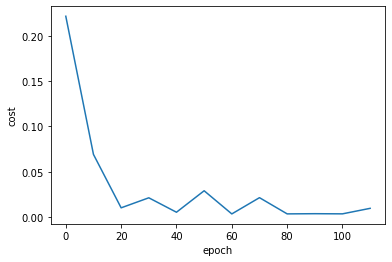

In [80]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)